# [Cardio Vascular Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

# EDA + Data Prep

### Features (X)
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm)
- Weight | Objective Feature | weight | float (kg)
- Gender | Objective Feature | gender | categorical code
- Systolic blood pressure | Examination Feature | ap_hi | int
- Diastolic blood pressure | Examination Feature | ap_lo | int
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
- Smoking | Subjective Feature | smoke | binary
- Alcohol intake | Subjective Feature | alco | binary
- Physical activity | Subjective Feature | active | binary

In [ ]:
import pandas as pd
from utils import validation_curve_model, calculate_mean_error
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

file_path = 'cardio_train_dataset.csv'

cardio_data_frame = pd.read_csv(file_path)

cardio_data_frame = cardio_data_frame.head(1000)

## Categorical Feature - One-Hot Encoded

we will map our categorical feature to numerical values

In [ ]:
cardio_data_frame['gender'] = LabelEncoder().fit_transform(cardio_data_frame['gender'])

cardio_data_frame.head()

## Data Imputation


In [ ]:
cardio_data_frame = cardio_data_frame.dropna()

cardio_data_frame = cardio_data_frame.drop('id', axis=1)

cardio_data_frame['age'] = round(cardio_data_frame['age'] / 365)

cardio_data_frame['bmi'] = round(cardio_data_frame['weight'] / (cardio_data_frame['height'] / 100)**2)

cardio_data_frame.head()


# Outliers Standardization

In [ ]:


scaler = preprocessing.StandardScaler().fit(cardio_data_frame)

cardio_data_frame_std = scaler.transform(cardio_data_frame)


#cardio_data_frame_std.mean(axis=0)

#cardio_data_frame_std.std(axis=0)

In [ ]:
cardio_features = ['age', 'gender', 'height','weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']

X = cardio_data_frame[cardio_features]
X.describe()

### Y Axis
 - Presence or absence of cardiovascular disease | Target Variable | cardio | binary

In [ ]:
Y = cardio_data_frame.cardio
Y.describe()


# Data plotting


In [ ]:
sns.set_theme(style='whitegrid')

cardio_features_to_plot = ['age', 'bmi', 'cholesterol', 'gluc', 'cardio']

#sns.pairplot(x_vars=cardio_features, y_vars=cardio_features, data=cardio_data_frame, palette='bright')
#cardio_data_frame[cardio_features].corr()

#sns.pairplot(data=cardio_data_frame[cardio_features_to_plot], hue='cardio')

In [ ]:
#sns.displot(data=cardio_data_frame, x='bmi', hue='cardio')

#sns.displot(data=cardio_data_frame, x='age', hue='cardio')

#x_melted = pd.melt(frame=cardio_data_frame, id_vars="cardio", value_vars=cardio_features, var_name="features", value_name="value", col_level=None)
#x_melted


#plt.figure(figsize=(10,10))
#sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
#plt.xticks(rotation=90)


# Model Tuning


# Split the Dataset

In [ ]:
trainX, validationX, trainY, validationY = train_test_split(X, Y, random_state=0)


 # 1. Decision Tree Model Implementation

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 54

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

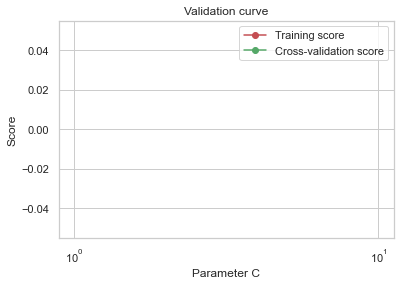

In [ ]:
# Define model. Specify a number for random_state to ensure same results each run
cardio_decision_tree_model = DecisionTreeClassifier(random_state=1)

#Fitting Model
#cardio_decision_tree_model.fit(trainX, trainY)

#cardio_decision_tree_model.predict(validationX)

### Mean Absolute Error

In [ ]:
calculate_mean_error(cardio_decision_tree_model, validationX, validationY)



NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

 # 2. KNN Model Implementation

In [ ]:
cardio_decision_knn_model = KNeighborsClassifier()

cardio_decision_knn_model.fit(trainX, trainY)

cardio_decision_knn_model.predict(validationX)


### Mean Absolute Error

In [ ]:
calculate_mean_error(cardio_decision_tree_model, validationX, validationY)

 # 3. SVM Model Implementation

In [ ]:
cardio_decision_svc_model = SVC()

cardio_decision_svc_model.fit(trainX, trainY)

cardio_decision_svc_model.predict(validationX)


### Mean Absolute Error

In [ ]:
calculate_mean_error(cardio_decision_tree_model, validationX, validationY)

 # 4. NN Model Implementation

In [ ]:
cardio_decision_nn_model = MLPClassifier(alpha=1e-5,
                                         hidden_layer_sizes=(25, 14), random_state=5)

cardio_decision_nn_model.fit(trainX, trainY)

cardio_decision_nn_model.predict(validationX)

### Mean Absolute Error

In [ ]:
calculate_mean_error(cardio_decision_tree_model, validationX, validationY)


 # 5. Logistic Regression Model Implementation

In [ ]:

cardio_decision_lr_model = LogisticRegression( random_state=1, solver='saga')

cardio_decision_lr_model.fit(trainX, trainY)

cardio_decision_lr_model.predict(validationX)

### Mean Absolute Error

In [ ]:
calculate_mean_error(cardio_decision_tree_model, validationX, validationY)

 # 6. Ensemble Model Implementation

In [ ]:
cardio_decision_bagging_model = bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

cardio_decision_bagging_model.fit(trainX, trainY)

cardio_decision_bagging_model.predict(validationX)

### Mean Absolute Error

In [ ]:
calculate_mean_error(cardio_decision_tree_model, validationX, validationY)

